In [ ]:
import numpy as np # Multi-dimensional array object
import pandas as pd # Data Manipulation
import seaborn as sns # Data Visualization
import matplotlib.pyplot as plt # Data Visualization

In [ ]:
Voiture = pd.read_table("cars-origin.txt",sep="\t",header=0,index_col=0)

In [ ]:
print(Voiture.shape)

(392, 6)


In [ ]:
#Les noms des colonnes
print(Voiture.columns)

Index(['mpg', 'displacement', 'horsepower', 'weight', 'acceleration',
       'origin'],
      dtype='object')


In [ ]:
#Type de chaque colonne
print(Voiture.dtypes)

mpg              int64
displacement     int64
horsepower       int64
weight           int64
acceleration     int64
origin          object
dtype: object


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f55f6862510>,
      dtype=object)

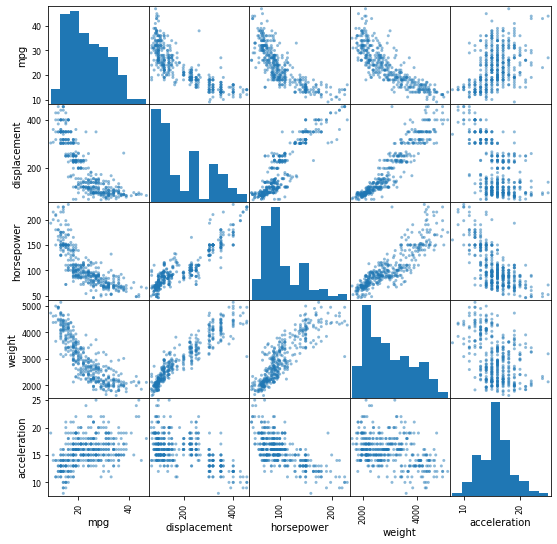

In [ ]:
#graphique - croisement deux à deux des variables
from pandas.plotting import scatter_matrix 
scatter_matrix(Voiture,figsize=(9,9))

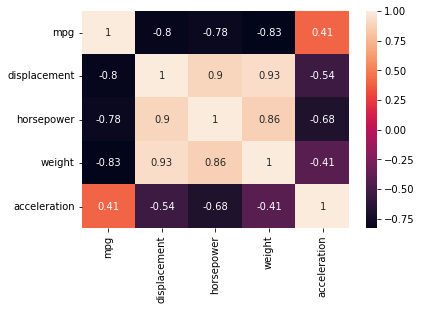

In [ ]:
# Obtain the correlation matrix
sns.heatmap(Voiture.corr(), annot = True)

In [ ]:
# valeurs de toutes les colonnes
#colonnes => 0:5 (0 à 5 [non inclus])
#lignes = : (toutes les colonnes)
V_SansLabels=Voiture.iloc[:,0:5];
#Labels
V_Labels=Voiture.iloc[:,5];

In [ ]:
from collections import Counter
from imblearn.over_sampling import BorderlineSMOTE

In [ ]:
def BSMOTE(X,y):
# summarize class distribution
    counter = Counter(y)
    print(counter)
# transform the dataset
    X, y = BorderlineSMOTE().fit_resample(X, y)
# summarize the new class distribution
    counter = Counter(y)
    print(counter)
    return X,y

In [ ]:
V_SansLabels,V_Labels=  BSMOTE(V_SansLabels,V_Labels)

Counter({'american': 245, 'asian': 79, 'european': 68})
Counter({'asian': 245, 'american': 245, 'european': 245})


In [ ]:
#k-means 
import numpy as np
from sklearn import cluster 
kmeans = cluster.KMeans(n_clusters=3);
kmeans.fit(V_SansLabels);
#index triés des groupes 
idk = np.argsort(kmeans.labels_);
#affichage des observations et leurs groupes 
print(pd.DataFrame(V_SansLabels.index[idk],kmeans.labels_[idk]));
kmeans.labels_
#distances aux centres de classes des observations 
print(kmeans.transform(V_SansLabels));
#correspondance avec les groupes réels 
pd.crosstab(V_Labels,kmeans.labels_)

      0
0   734
0   185
0   186
0   187
0   188
..  ...
2   474
2    80
2   472
2   481
2     0

[735 rows x 1 columns]
[[1298.66422772 2549.8676499   516.40906231]
 [1262.96694102 2514.26583881  480.70957614]
 [1156.95439754 2408.44578883  374.62618052]
 ...
 [  51.86795192 1232.41646239  807.50307101]
 [ 943.05609619 2194.90886103  161.24804556]
 [  64.95850227 1212.75847461  827.75341906]]


col_0,0,1,2
origin,,,
american,102,104,39
asian,69,0,176
european,77,1,167


[0.66259946 0.61208252 0.59554235 0.57027846 0.54473164 0.55210926
 0.55573686 0.55504259 0.55089325]


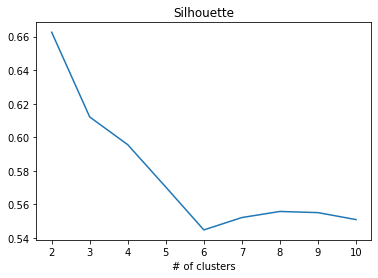

In [ ]:
#librairie pour évaluation des partitions 
from sklearn import metrics

#utilisation de la métrique "silhouette" 
#faire varier le nombre de clusters de 2 à 10 
res = np.arange(9,dtype="double") 
for k in np.arange(9): 
  km = cluster.KMeans(n_clusters=k+2) 
  km.fit(V_SansLabels) 
  res[k] = metrics.silhouette_score(V_SansLabels,km.labels_)
print(res)
#graphique 
import matplotlib.pyplot as plt 
plt.title("Silhouette") 
plt.xlabel("# of clusters") 
plt.plot(np.arange(2,11,1),res) 
plt.show()

In [14]:
#librairies pour la CAH 
from matplotlib import pyplot as plt 
from scipy.cluster.hierarchy import dendrogram, linkage,fcluster

In [15]:
#générer la matrice des distances 
Z = linkage(V_SansLabels,method='ward',metric='euclidean')

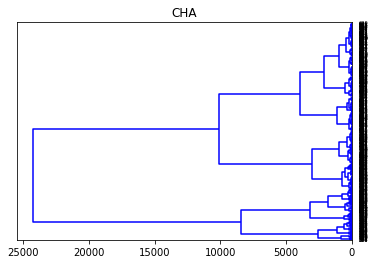

In [16]:
#affichage du dendrogramme 
plt.title("CHA") 
dendrogram(Z,labels=V_SansLabels.index,orientation='left',color_threshold=0) 
plt.show()

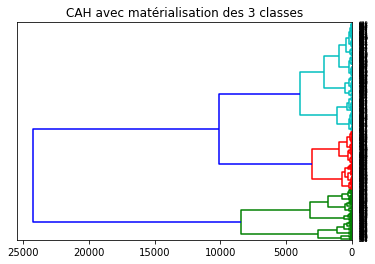

[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 3 3 3 3 3 3 3 3 3 2 3 3 2 3
 3 3 2 3 2 2 3 3 3 2 3 2 3 3 3 3 2 3 2 2 3 3 2 3 3 2 2 2 2 3 2 3 3 3 3 3 3
 2 3 2 3 2 3 3 2 2 2 3 3 3 2 2 3 2 3 2 3 3 2 3 3 3 3 3 2 3 2 3 3 3 3 2 2 3
 3 2 2 2 3 3 3 2 2 3 3 2 

In [27]:
# matérialisation des deux classes (hauteur t = 17500) 
plt.title('CAH avec matérialisation des 3 classes') 
dendrogram(Z,labels=V_SansLabels.index,orientation='left',color_threshold=9000) 
plt.show()

#découpage à la hauteur t = 5000==> identifiants de 2 groupes obtenus 
groupes_cah = fcluster(Z,t=9000,criterion='distance') 
print(groupes_cah)

#index triés des groupes 
import numpy as np 
idg = np.argsort(groupes_cah)

#affichage des observations et leurs groupes
print(pd.DataFrame(V_SansLabels.index[idg],groupes_cah[idg]))

In [28]:
#correspondance les vrais labels avec les groupes de la CAH 
pd.crosstab(V_Labels,groupes_cah)

col_0,1,2,3
origin,,,
american,147,60,38
asian,0,74,171
european,25,62,158
